# Seminario de Deep Learning

**Autor: Antonio Elias Sánchez Soto**

**BDFC 301**

### Importacion y exploracion inicial de los datos.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data_Cortex_Nuclear.csv")
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [1]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [ ]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


## Tratamiendo y normalizacion

In [ ]:
"""# tratamiento de columnas numericas, valores nulos por medias
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        df[i]=df[i].fillna(df[i].mean())
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
df = df.drop(columns="MouseID")
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,Control,Memantine,C/S,c-CS-m


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
numeric=[]
for i in df.columns:
    if df[i].dtype in ["float64", "int64"]:
        numeric.append(i)

df[numeric]=scaler.fit_transform(df[numeric])

In [ ]:
for i in df.columns:
    if df[i].dtype in ["object"]:
        print(f"{df[i].value_counts()}")

Genotype
Ts65Dn     297
Control    255
Name: count, dtype: int64
Treatment
Saline       297
Memantine    255
Name: count, dtype: int64
Behavior
C/S    285
S/C    267
Name: count, dtype: int64
class
t-CS-m    90
c-SC-s    75
t-CS-s    75
c-CS-s    75
t-SC-s    72
c-SC-m    60
t-SC-m    60
c-CS-m    45
Name: count, dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=["class"])

In [ ]:
df['Genotype'].unique()

df['Genotype'] = df['Genotype'].map({'Control': 0, 'Ts65Dn': 1})
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Treatment,Behavior,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
75,1.436707,1.126128,1.705383,1.703232,1.499958,-0.450542,0.047550,0.077228,0.862572,0.761816,...,Memantine,C/S,True,False,False,False,False,False,False,False
76,1.232724,1.198861,1.381104,1.543155,1.528343,-0.028033,-0.303284,0.019442,0.354457,0.502343,...,Memantine,C/S,True,False,False,False,False,False,False,False
77,1.361014,1.258610,1.605906,1.830294,1.698169,-0.408545,-0.085447,0.139804,0.389816,0.954070,...,Memantine,C/S,True,False,False,False,False,False,False,False
78,0.989748,0.724574,0.625917,0.896770,1.022459,-0.483850,-0.560389,0.113739,-0.393751,0.349682,...,Memantine,C/S,True,False,False,False,False,False,False,False
79,0.779828,0.738418,0.657906,0.922900,1.031234,-0.363433,-0.384122,0.181366,-0.389730,0.416548,...,Memantine,C/S,True,False,False,False,False,False,False,False


In [ ]:
df["Treatment"].unique()
df['Treatment'] = df['Treatment'].map({'Memantine': 0, 'Saline': 1})
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Treatment,Behavior,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
75,1.436707,1.126128,1.705383,1.703232,1.499958,-0.450542,0.047550,0.077228,0.862572,0.761816,...,0,C/S,True,False,False,False,False,False,False,False
76,1.232724,1.198861,1.381104,1.543155,1.528343,-0.028033,-0.303284,0.019442,0.354457,0.502343,...,0,C/S,True,False,False,False,False,False,False,False
77,1.361014,1.258610,1.605906,1.830294,1.698169,-0.408545,-0.085447,0.139804,0.389816,0.954070,...,0,C/S,True,False,False,False,False,False,False,False
78,0.989748,0.724574,0.625917,0.896770,1.022459,-0.483850,-0.560389,0.113739,-0.393751,0.349682,...,0,C/S,True,False,False,False,False,False,False,False
79,0.779828,0.738418,0.657906,0.922900,1.031234,-0.363433,-0.384122,0.181366,-0.389730,0.416548,...,0,C/S,True,False,False,False,False,False,False,False


In [ ]:
df["Behavior"].unique()
df['Behavior'] = df['Behavior'].map({'C/S': 0, 'S/C': 1})
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Treatment,Behavior,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
75,1.436707,1.126128,1.705383,1.703232,1.499958,-0.450542,0.047550,0.077228,0.862572,0.761816,...,0,0,True,False,False,False,False,False,False,False
76,1.232724,1.198861,1.381104,1.543155,1.528343,-0.028033,-0.303284,0.019442,0.354457,0.502343,...,0,0,True,False,False,False,False,False,False,False
77,1.361014,1.258610,1.605906,1.830294,1.698169,-0.408545,-0.085447,0.139804,0.389816,0.954070,...,0,0,True,False,False,False,False,False,False,False
78,0.989748,0.724574,0.625917,0.896770,1.022459,-0.483850,-0.560389,0.113739,-0.393751,0.349682,...,0,0,True,False,False,False,False,False,False,False
79,0.779828,0.738418,0.657906,0.922900,1.031234,-0.363433,-0.384122,0.181366,-0.389730,0.416548,...,0,0,True,False,False,False,False,False,False,False


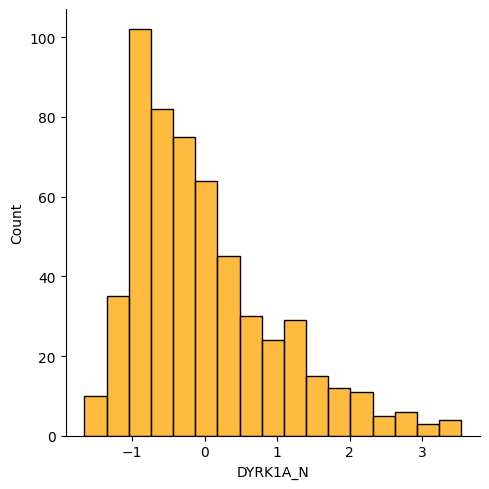

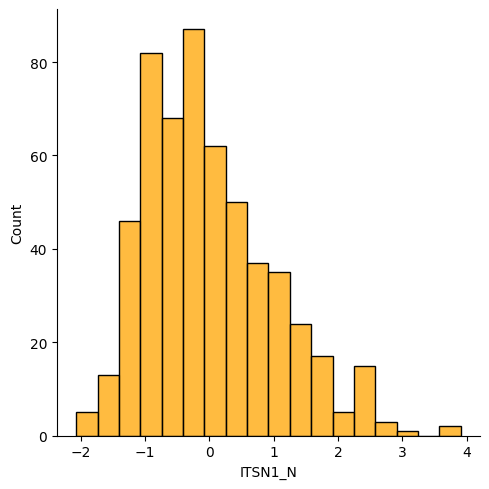

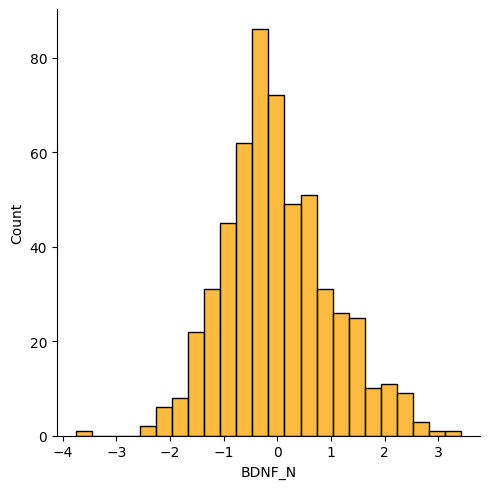

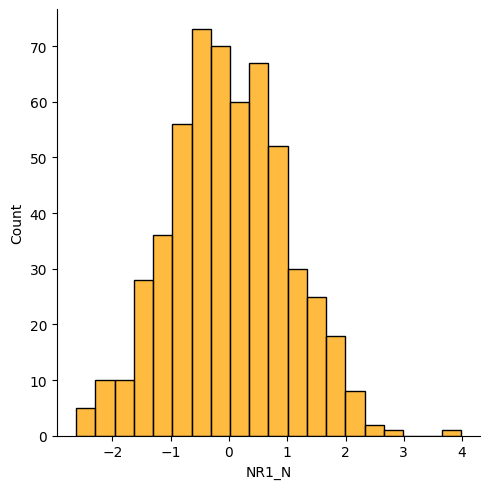

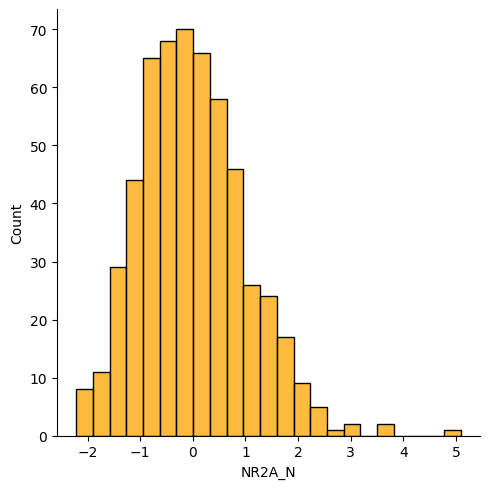

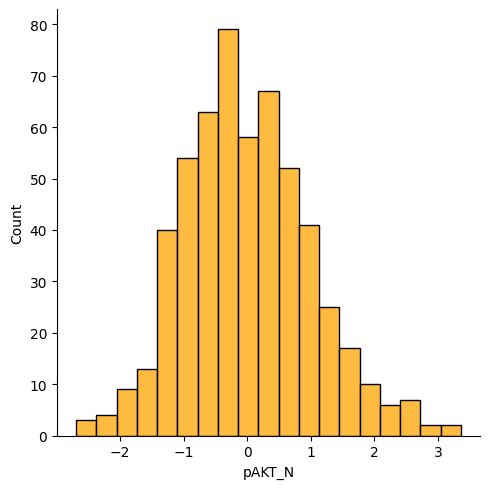

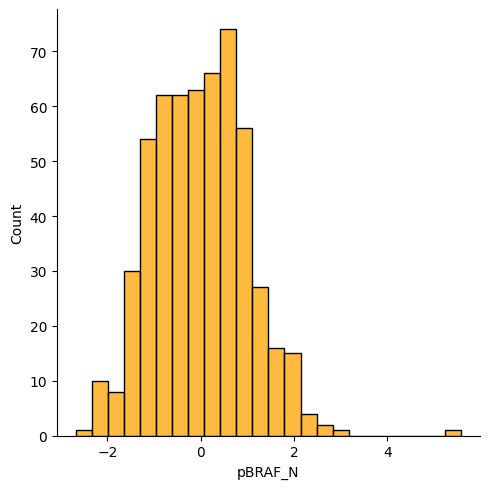

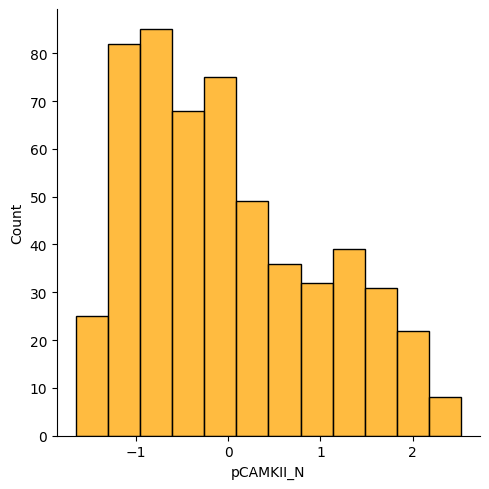

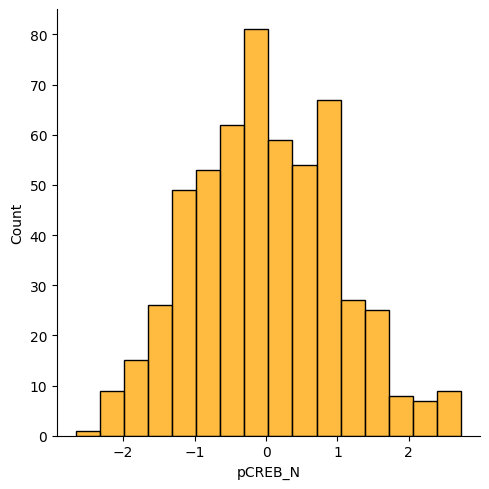

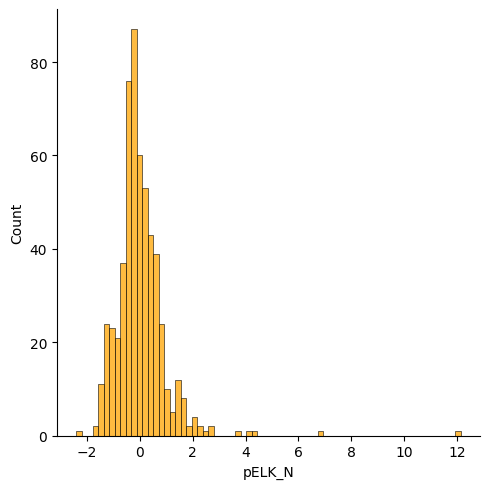

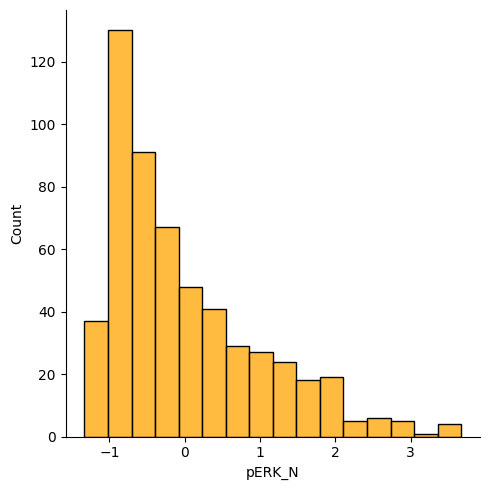

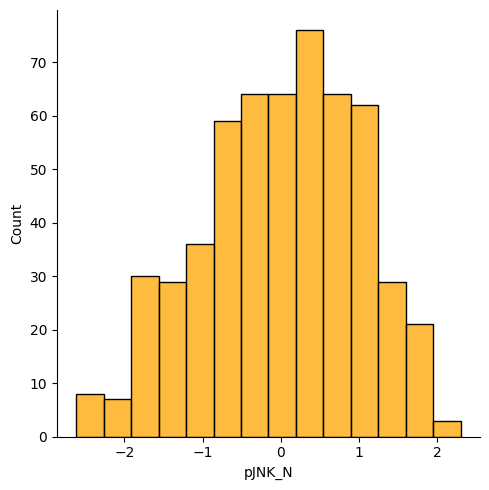

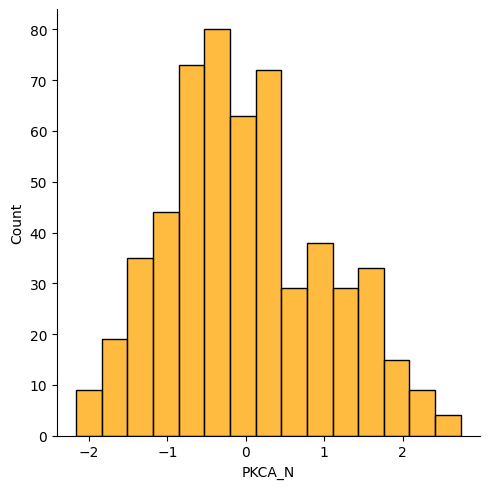

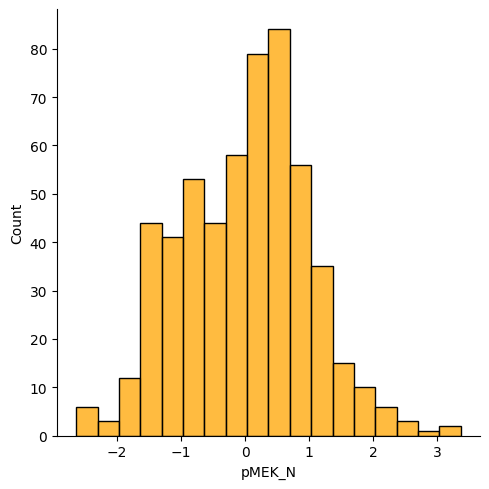

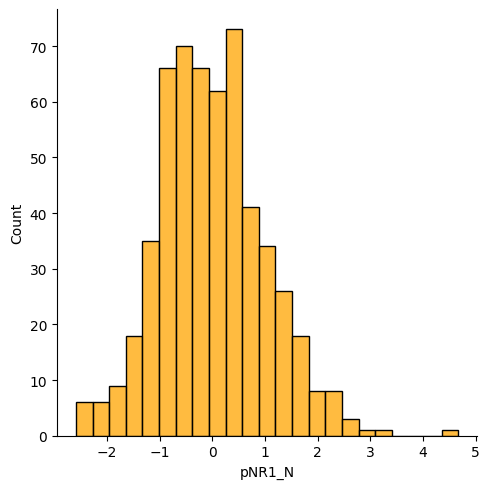

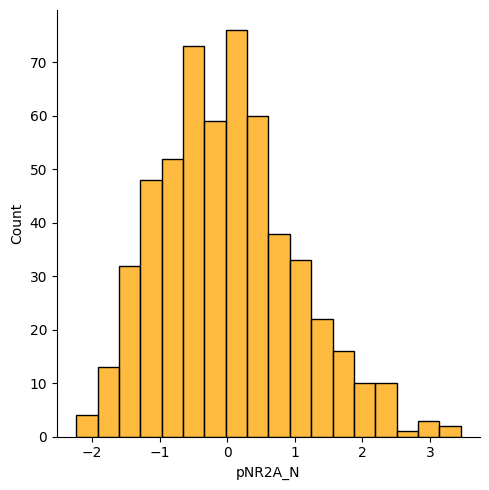

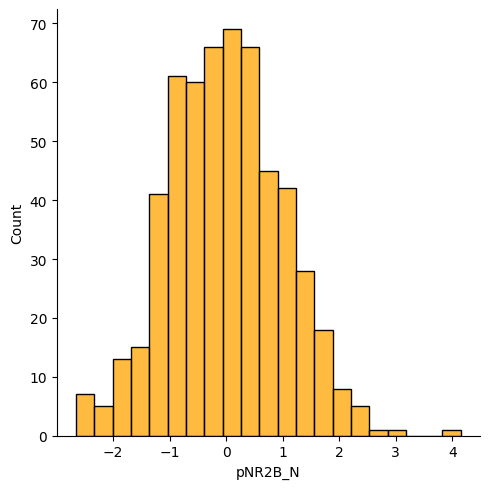

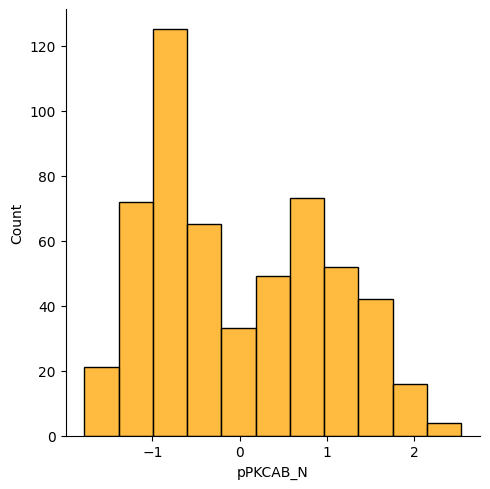

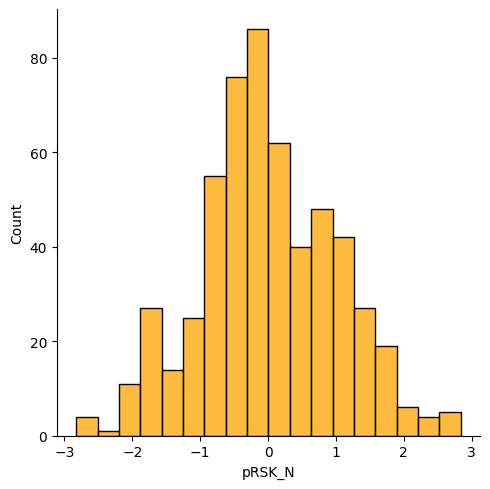

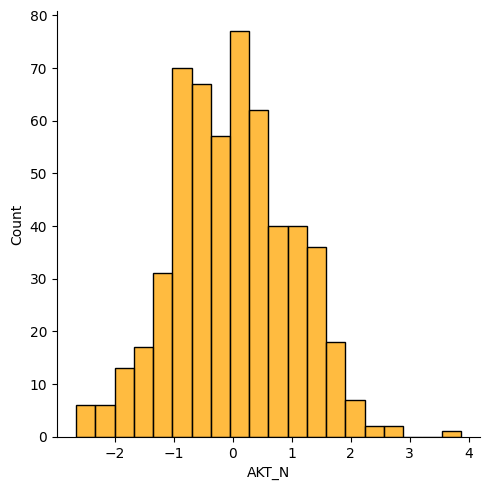

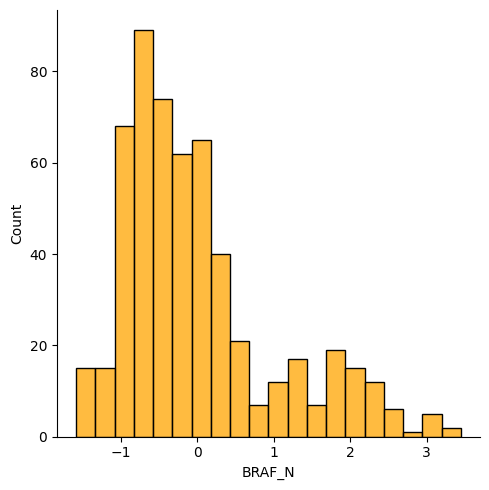

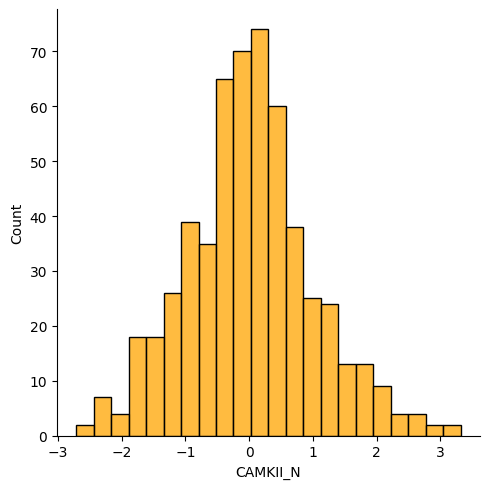

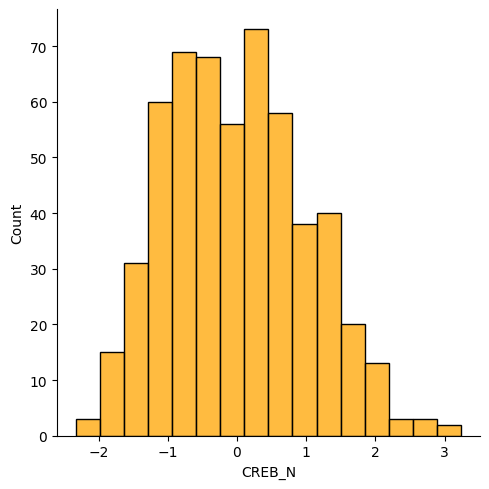

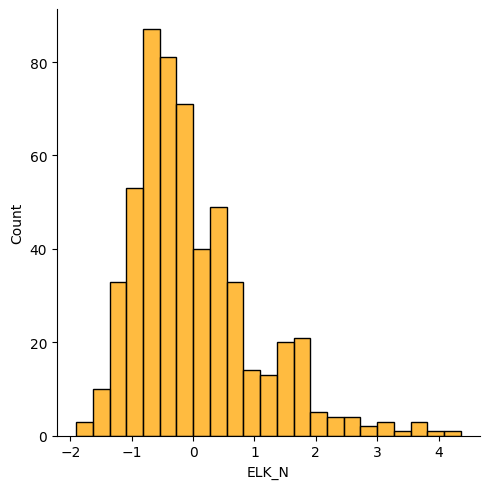

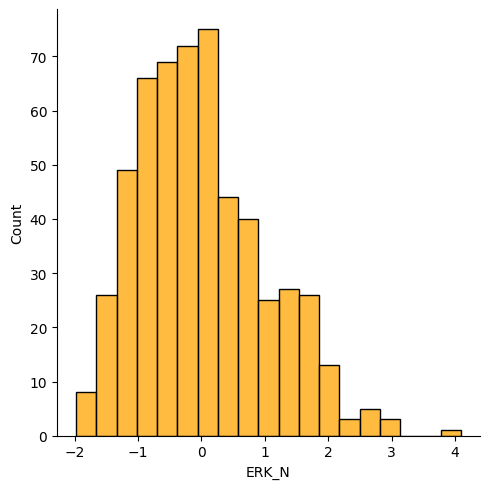

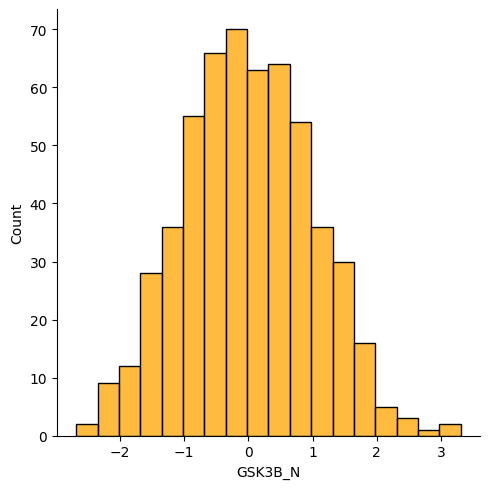

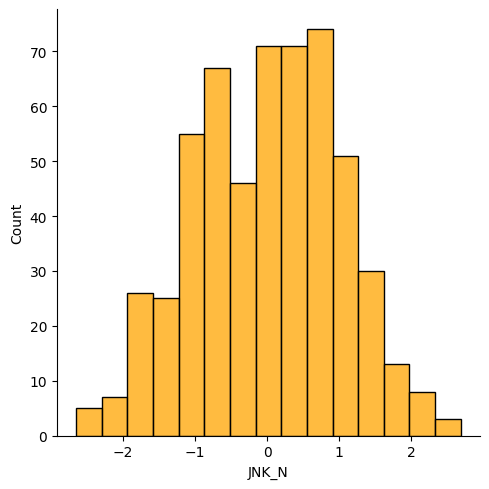

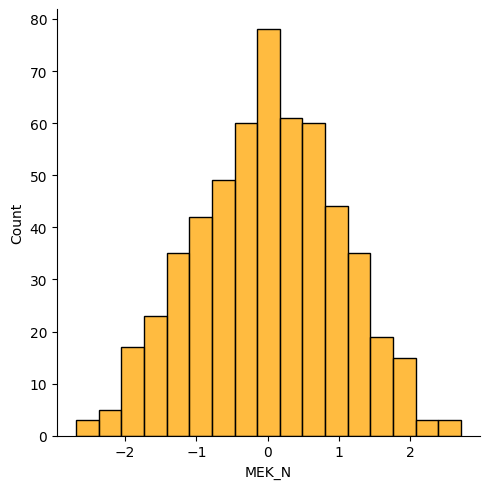

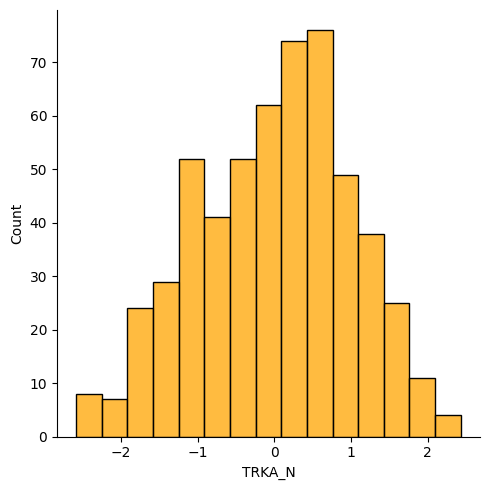

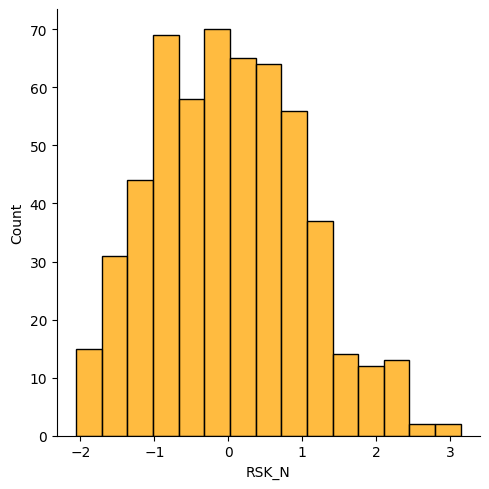

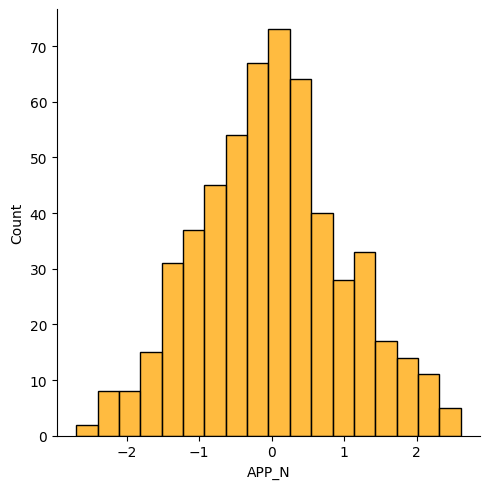

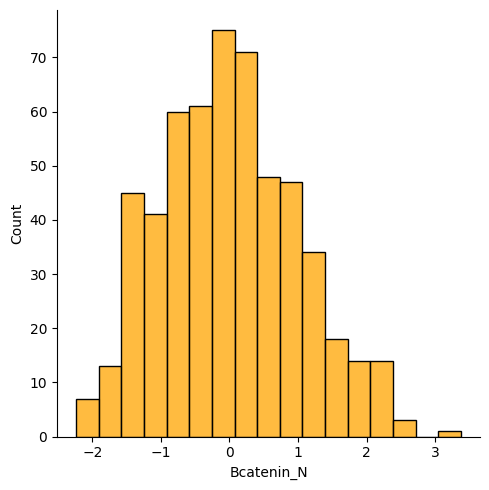

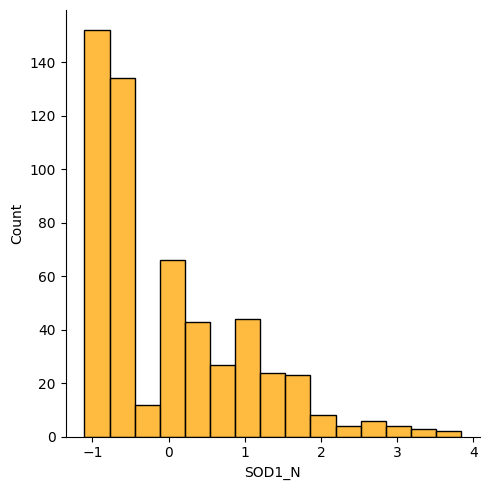

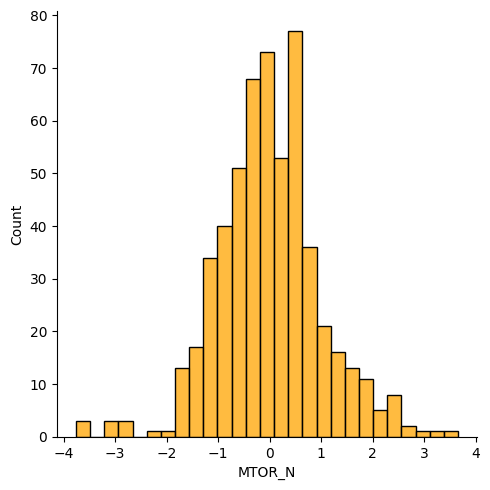

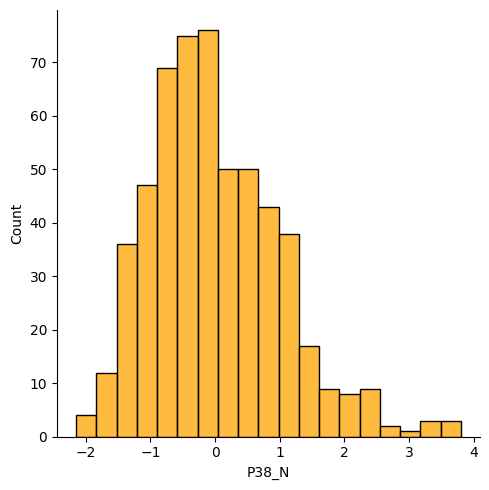

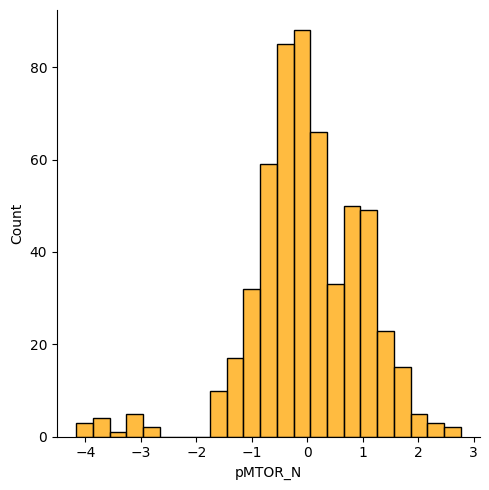

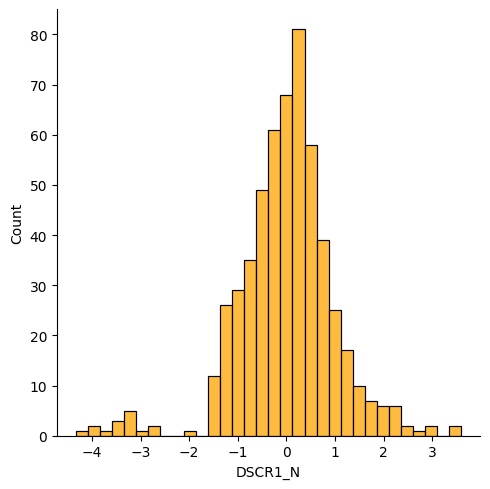

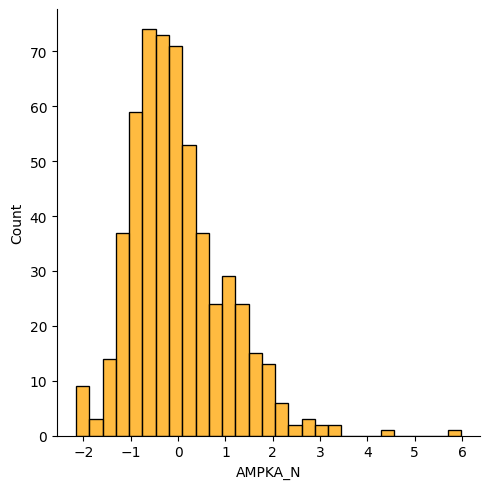

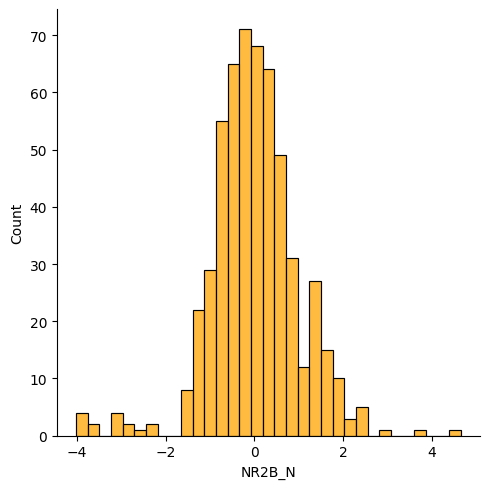

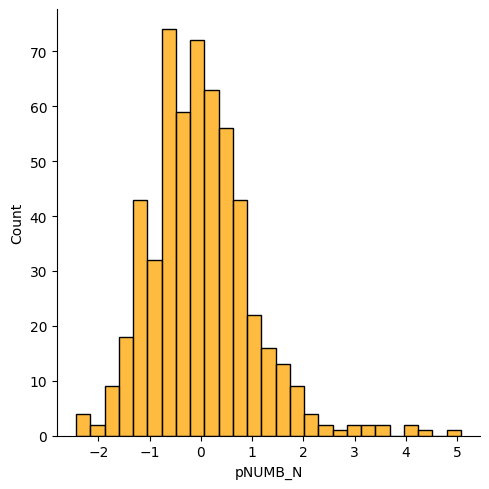

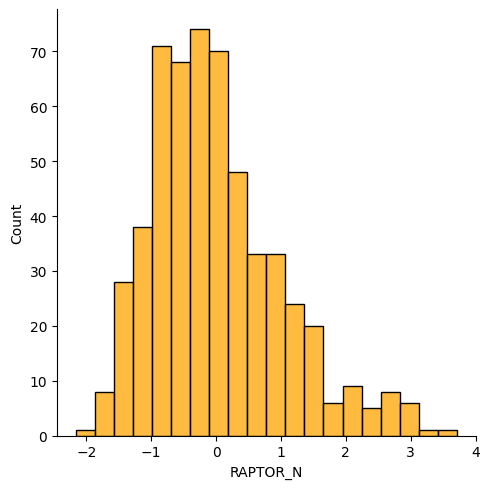

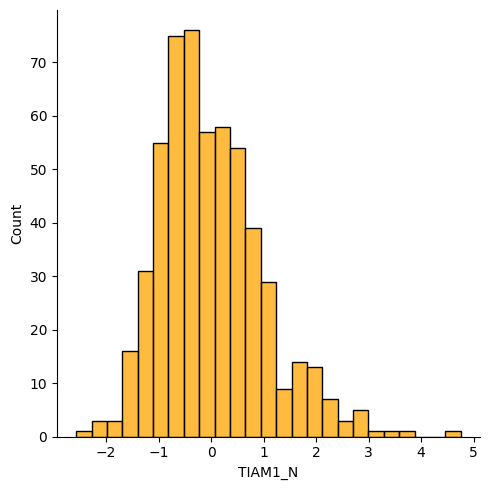

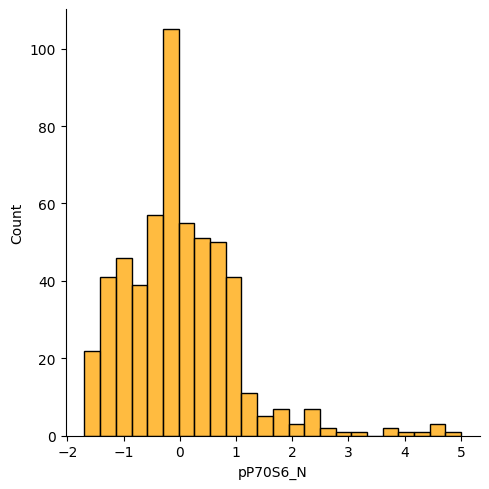

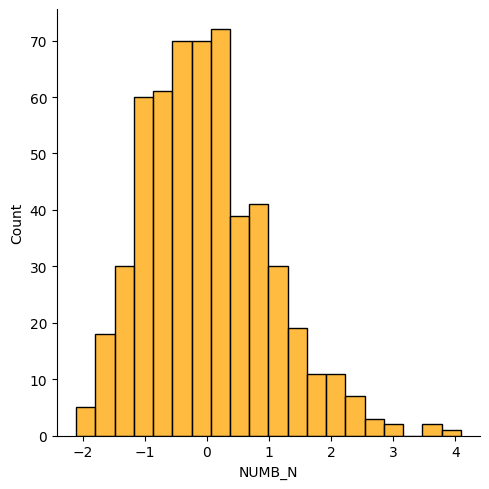

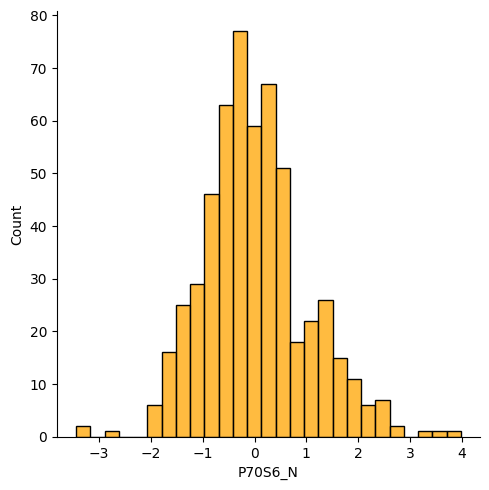

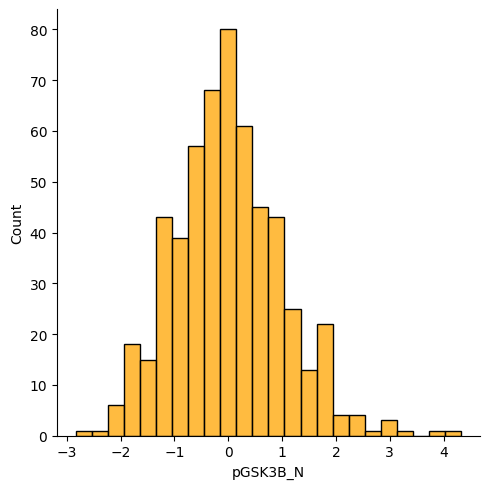

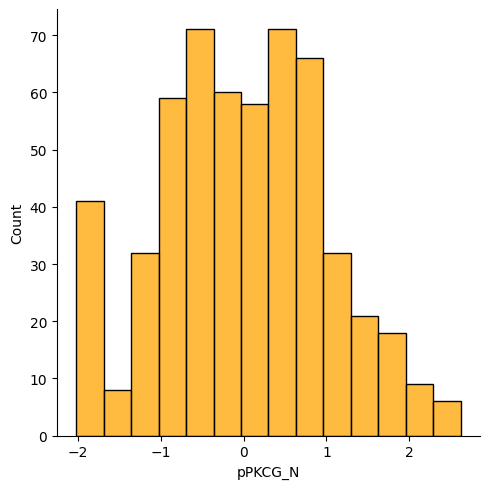

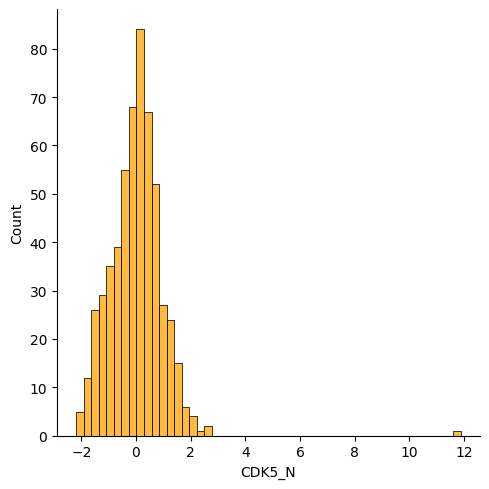

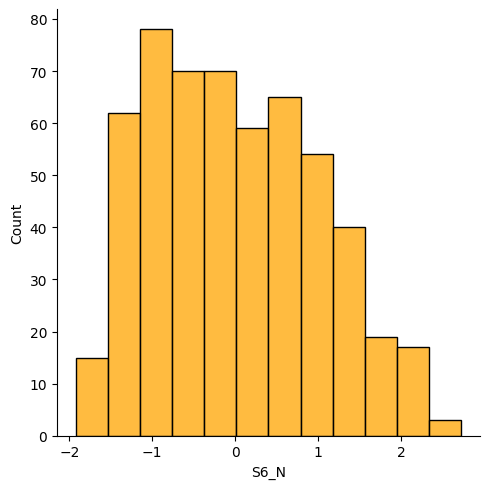

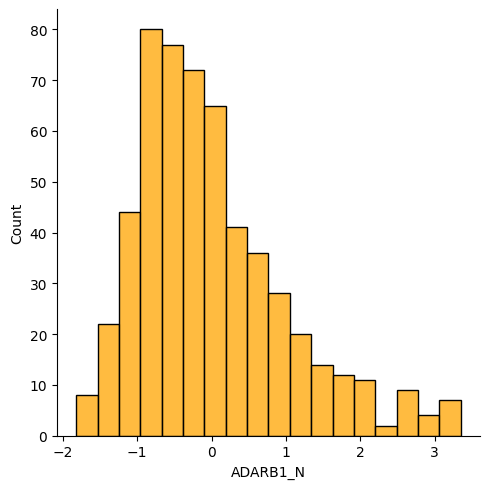

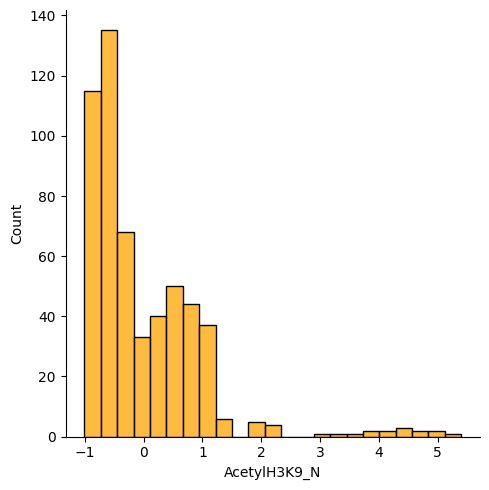

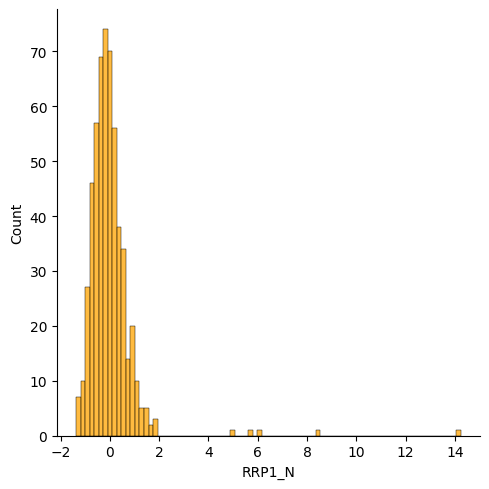

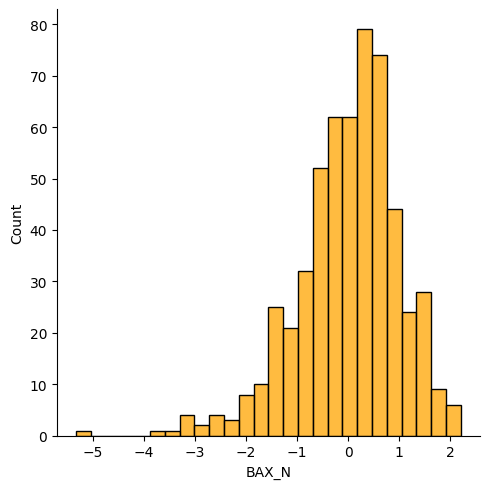

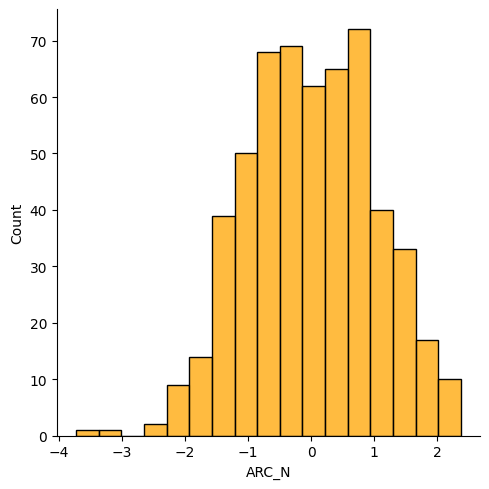

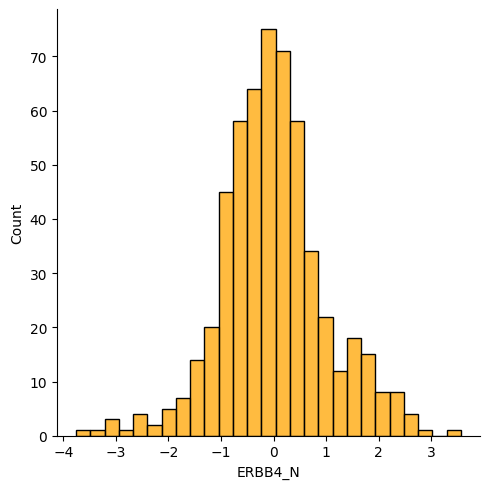

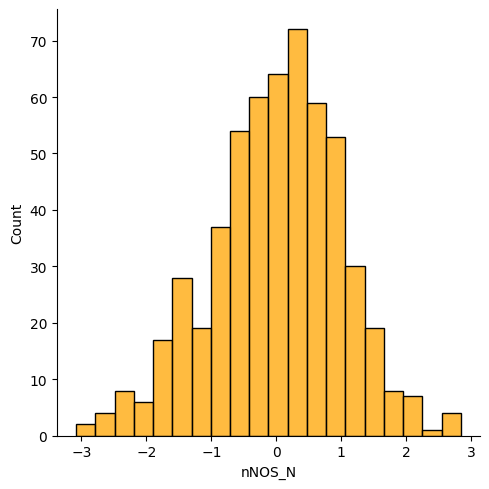

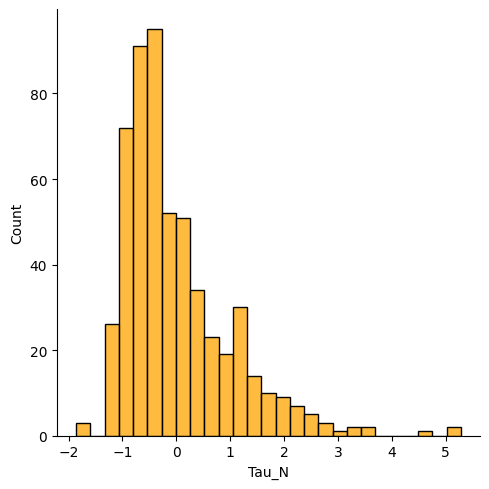

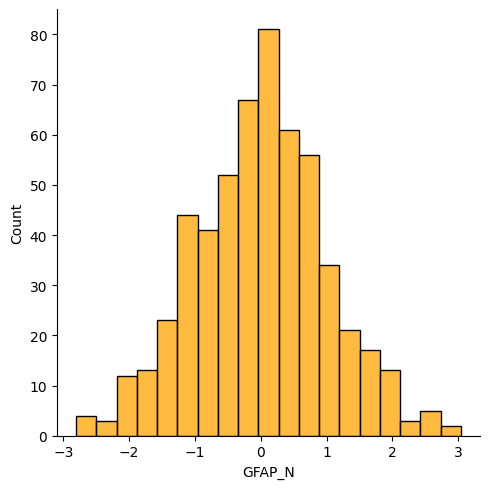

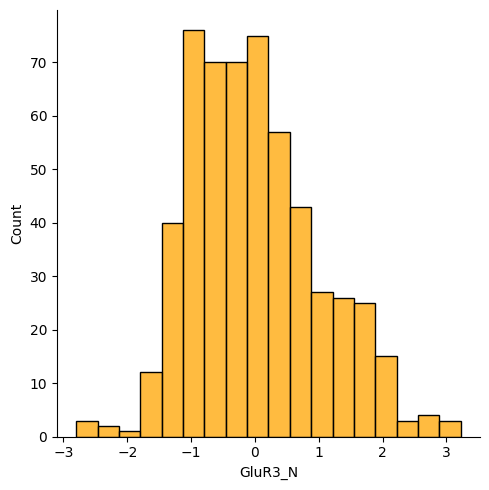

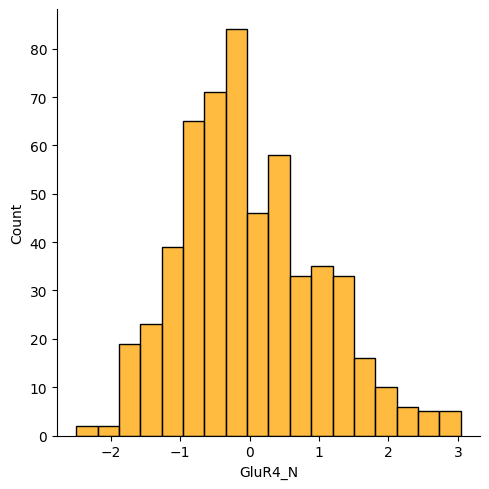

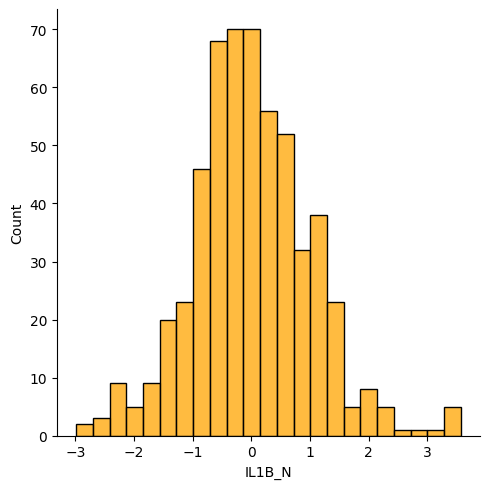

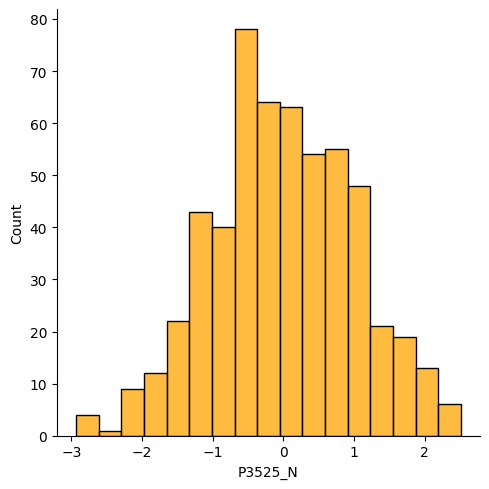

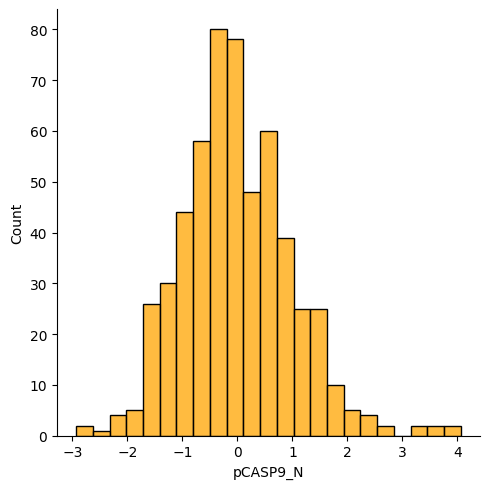

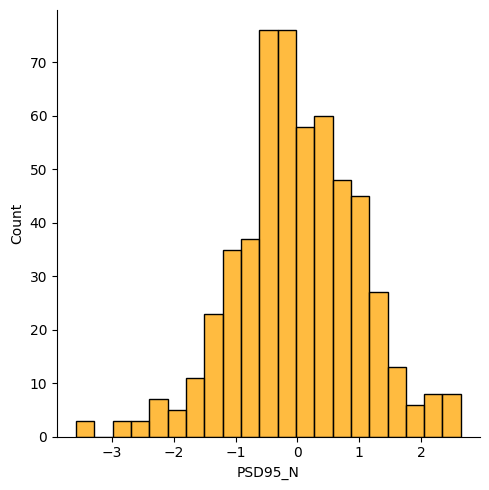

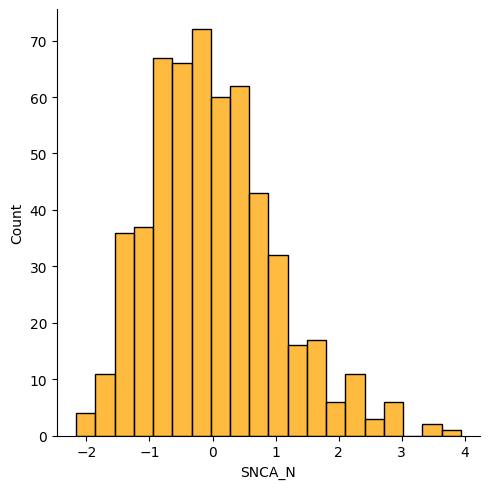

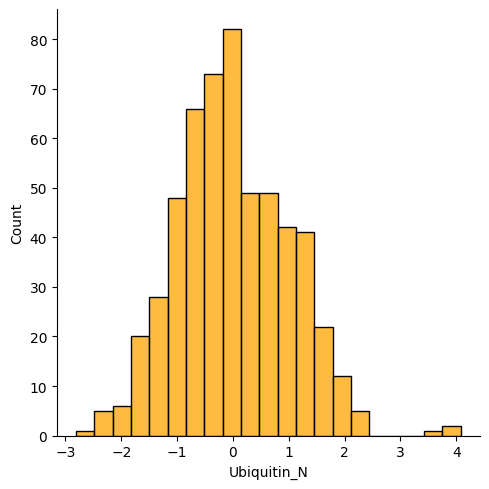

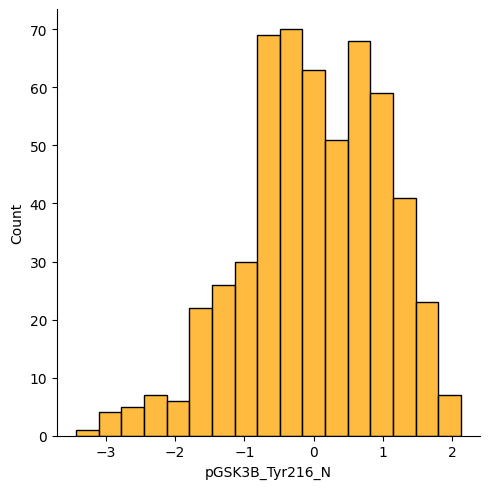

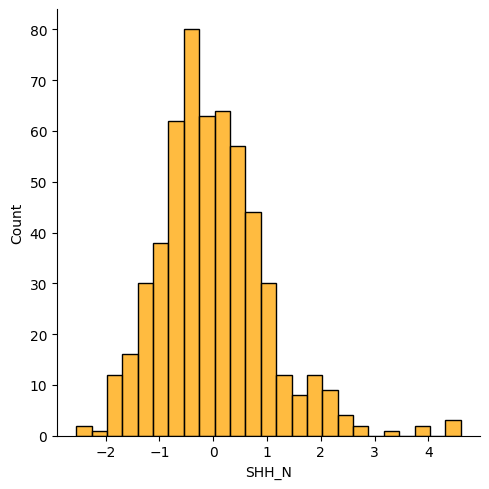

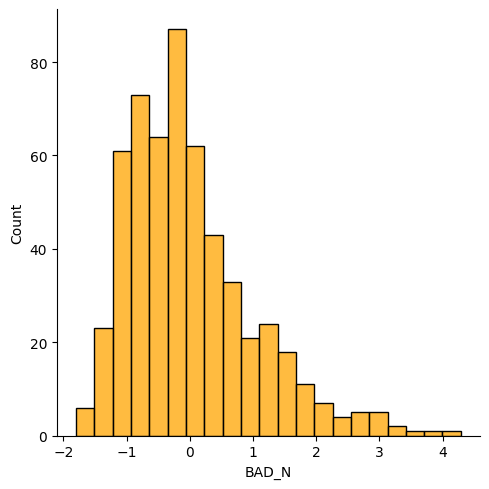

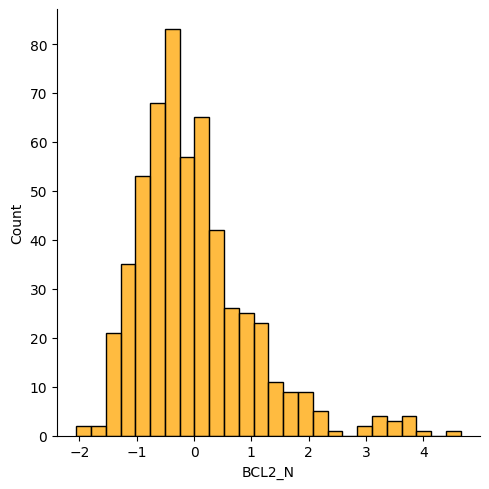

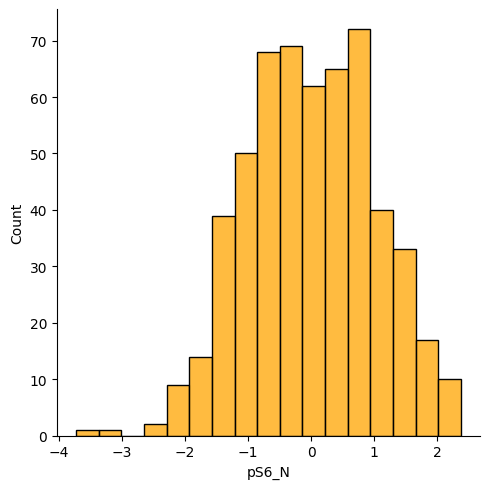

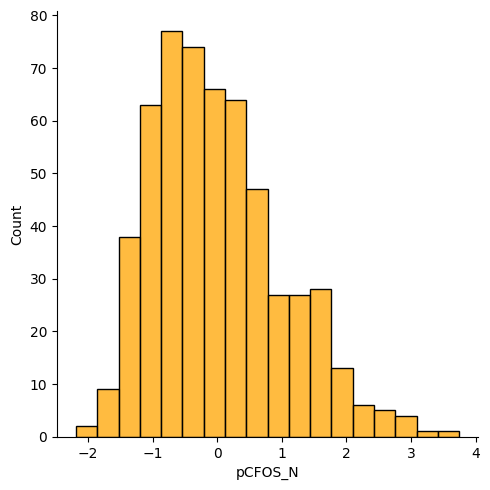

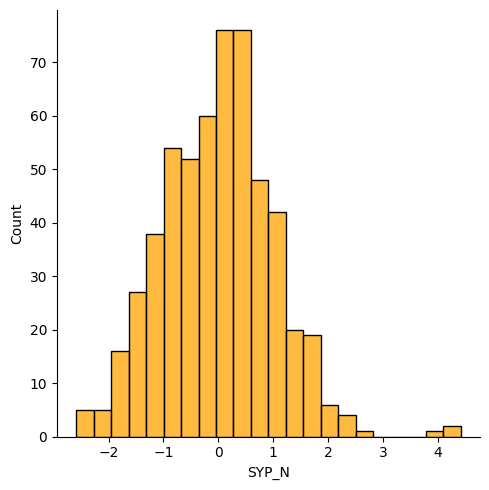

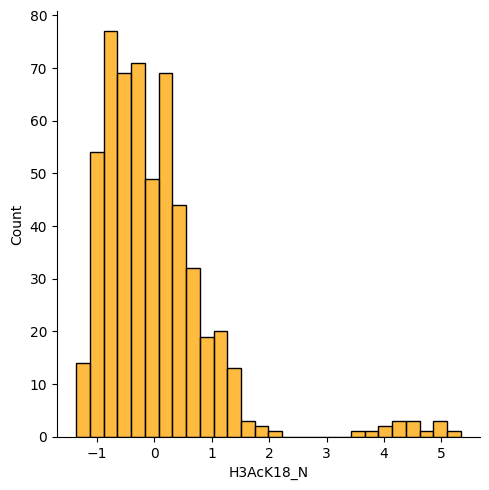

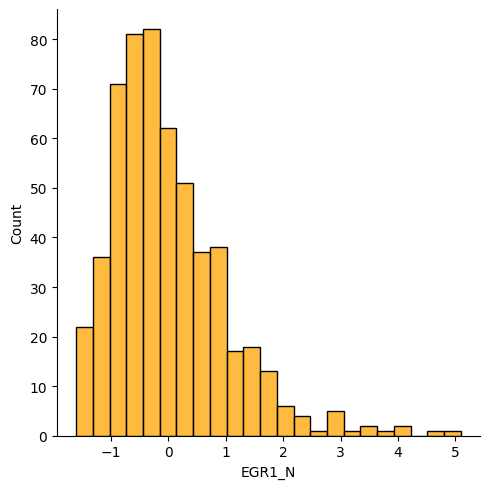

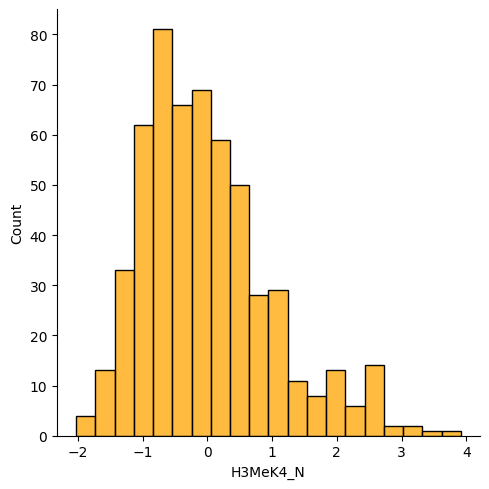

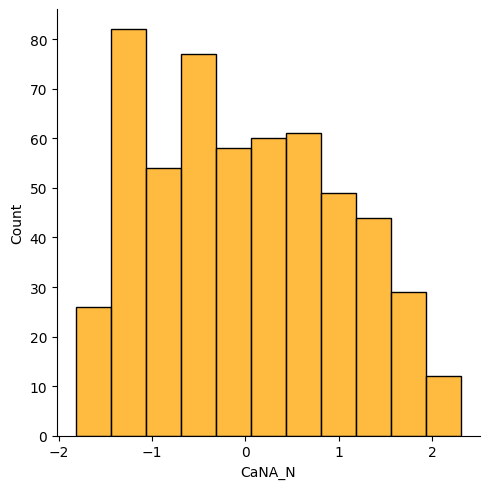

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

for i in numeric:
    sns.displot(df[i], color="orange")
    plt.show()

In [ ]:
correlation = df.corr()
sns.heatmap(correlation)
plt.show()

NameError: name 'df' is not defined

In [ ]:
# Ingenieria de atributos
corrTarget = abs(correlation["Genotype"])
relevantF = corrTarget[corrTarget>0.5]
print(relevantF)

APP_N       0.551710
Tau_N       0.541209
Genotype    1.000000
Name: Genotype, dtype: float64


In [ ]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Treatment,Behavior,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
75,1.436707,1.126128,1.705383,1.703232,1.499958,-0.450542,0.047550,0.077228,0.862572,0.761816,...,0,0,True,False,False,False,False,False,False,False
76,1.232724,1.198861,1.381104,1.543155,1.528343,-0.028033,-0.303284,0.019442,0.354457,0.502343,...,0,0,True,False,False,False,False,False,False,False
77,1.361014,1.258610,1.605906,1.830294,1.698169,-0.408545,-0.085447,0.139804,0.389816,0.954070,...,0,0,True,False,False,False,False,False,False,False
78,0.989748,0.724574,0.625917,0.896770,1.022459,-0.483850,-0.560389,0.113739,-0.393751,0.349682,...,0,0,True,False,False,False,False,False,False,False
79,0.779828,0.738418,0.657906,0.922900,1.031234,-0.363433,-0.384122,0.181366,-0.389730,0.416548,...,0,0,True,False,False,False,False,False,False,False


In [ ]:

from sklearn.feature_selection import mutual_info_classif
X = df.drop(columns=["Genotype"])
y = df["Genotype"]
infoGain = mutual_info_classif(X, y)
infoGainDF=pd.DataFrame({"Feature":X.columns, "InfoGain":infoGain})
infoGainDF=infoGainDF.sort_values(by="InfoGain",ascending=False)
print(infoGainDF)

         Feature  InfoGain
56         Tau_N  0.261504
46       pPKCG_N  0.190992
1        ITSN1_N  0.172575
30         APP_N  0.165795
50  AcetylH3K9_N  0.144142
..           ...       ...
3          NR1_N  0.000000
27         MEK_N  0.000000
55        nNOS_N  0.000000
78      Behavior  0.000000
75      H3MeK4_N  0.000000

[87 rows x 2 columns]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif,k=6)
selector.fit(X,y)
consistentFeatures=X.columns[selector.get_support()]
print(consistentFeatures)

Index(['ITSN1_N', 'APP_N', 'S6_N', 'Tau_N', 'class_c-CS-s', 'class_c-SC-s'], dtype='object')


In [ ]:
selectedFeatures=set(relevantF.index).intersection(consistentFeatures)#.intersection(infoGainDF["Feature"])
print("Atributos seleccionados en comun por los tres metodos")
print(selectedFeatures)
selecteDF = df[list(selectedFeatures)]

Atributos seleccionados en comun por los tres metodos
{'APP_N', 'Tau_N'}


<Axes: xlabel='Tau_N', ylabel='APP_N'>

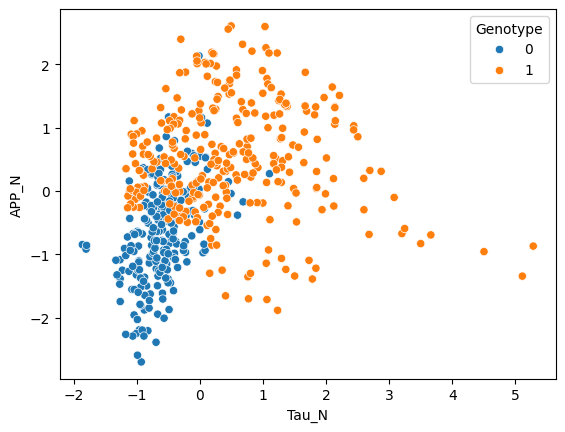

In [ ]:
sns.scatterplot(x = 'Tau_N', y = 'APP_N', hue = "Genotype", data = df)

In [ ]:
X = selecteDF
y = df["Genotype"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (441, 2)
Tamaño de X_test: (111, 2)
Tamaño de y_train: (441,)
Tamaño de y_test: (111,)


## Deep Learning

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras import layers


#Arquitectura de la red neuronal
modelo = Sequential(
    [
        layers.Dense(4, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(2, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ]
)

d:\Coding\Laboratorios IA\entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Inicializacion de pesos y sesgos
for i, capa in enumerate(modelo.layers):
    if len(capa.weights) > 0:
        pesos, sesgos = capa.get_weights()
        print(f"\nCapa {i+1}: {capa.name}")
        print(f"Tipo: {capa.__class__.__name__}")
        print(f"Forma pesos: {pesos.shape} | Media: {np.mean(pesos):.4f} | Desviación: {np.std(pesos):.4f}")
        print(f"Forma sesgos: {sesgos.shape} | Valores iniciales: {sesgos[:2].round(4)}...")
    else:
        print(f"\nCapa {i+1}: {capa.name} (Sin parámetros entrenables)")


Capa 1: dense_6
Tipo: Dense
Forma pesos: (2, 4) | Media: 0.0058 | Desviación: 0.4138
Forma sesgos: (4,) | Valores iniciales: [0. 0.]...

Capa 2: dropout_4 (Sin parámetros entrenables)

Capa 3: dense_7
Tipo: Dense
Forma pesos: (4, 2) | Media: 0.0077 | Desviación: 0.4015
Forma sesgos: (2,) | Valores iniciales: [0. 0.]...

Capa 4: dropout_5 (Sin parámetros entrenables)

Capa 5: dense_8
Tipo: Dense
Forma pesos: (2, 1) | Media: 0.0327 | Desviación: 0.8196
Forma sesgos: (1,) | Valores iniciales: [0.]...


In [ ]:
# Asegúrate de que los pesos sean float64
pesos_capa_1 = tf.cast(modelo.layers[0].weights[0], tf.float64)
sesgo_capa_1 = tf.cast(modelo.layers[0].weights[1], tf.float64)

# Realiza la propagación hacia adelante
salida_capa_1 = tf.nn.relu(tf.matmul(X_train, pesos_capa_1) + sesgo_capa_1)

salida_capa_1_dropout = tf.where(tf.random.uniform(tf.shape(salida_capa_1)) > 0.3, salida_capa_1, tf.zeros_like(salida_capa_1))

# Repite el proceso para las siguientes capas asegurándote de los tipos de datos
pesos_capa_2 = tf.cast(modelo.layers[2].weights[0], tf.float64)
sesgo_capa_2 = tf.cast(modelo.layers[2].weights[1], tf.float64)

salida_capa_2 = tf.nn.relu(tf.matmul(salida_capa_1_dropout, pesos_capa_2) + sesgo_capa_2)

salida_capa_2_dropout = tf.where(tf.random.uniform(tf.shape(salida_capa_2)) > 0.2, salida_capa_2, tf.zeros_like(salida_capa_2))

# Finalmente, para la capa de salida
pesos_capa_salida = tf.cast(modelo.layers[4].weights[0], tf.float64)
sesgo_capa_salida = tf.cast(modelo.layers[4].weights[1], tf.float64)

salida_final = tf.nn.sigmoid(tf.matmul(salida_capa_2_dropout, pesos_capa_salida) + sesgo_capa_salida)

# Visualiza las transformaciones
print("Salida Capa 1 (ReLU):", salida_capa_1)
print("Salida Capa 1 con Dropout:", salida_capa_1_dropout)
print("Salida Capa 2 (ReLu):", salida_capa_2)
print("Salida Capa 2 con Dropout:", salida_capa_2_dropout)
print("Salida Final (Sigmoid):", salida_final)

Salida Capa 1 (ReLU): tf.Tensor(
[[0.37705055 0.         0.         0.        ]
 [0.         0.72392909 0.         0.65587767]
 [0.25170711 0.         0.06983314 0.        ]
 ...
 [0.         0.         0.         0.24852143]
 [0.         0.         0.         0.61883493]
 [0.23886544 0.         0.         0.        ]], shape=(441, 4), dtype=float64)
Salida Capa 1 con Dropout: tf.Tensor(
[[0.37705055 0.         0.         0.        ]
 [0.         0.72392909 0.         0.65587767]
 [0.25170711 0.         0.06983314 0.        ]
 ...
 [0.         0.         0.         0.24852143]
 [0.         0.         0.         0.61883493]
 [0.23886544 0.         0.         0.        ]], shape=(441, 4), dtype=float64)
Salida Capa 2 (ReLu): tf.Tensor(
[[2.39719705e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.84633172e-01 0.00000000e+00]
 [8.22507922e-03 0.00000000e+00]
 [1.48526644e-01 0.00000000e+00]
 [1.11547014e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.42107038e-01 0.000000

In [ ]:
# Compilación con parámetros optimizados
modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

La función Binary Cross Entropy es ideal para problemas de clasificación binaria porque penaliza las predicciones incorrectas alejadas de la etiqueta real. La función logarítmica aumenta cuando la predicción se acerca a 0 o 1, pero la etiqueta real es lo opuesto.

El optimizador Adam calcula un promedio de los gradientes pasados y de los cuadrados de los gradientes. Ayuda a estabilizar la tasa de aprendizaje según la magnitud de los gradientes.

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5013 - loss: 0.6844 - val_accuracy: 0.6306 - val_loss: 0.6823
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5983 - loss: 0.6828 - val_accuracy: 0.6306 - val_loss: 0.6807
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5223 - loss: 0.6891 - val_accuracy: 0.6306 - val_loss: 0.6792
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5939 - loss: 0.6845 - val_accuracy: 0.6577 - val_loss: 0.6776
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6090 - loss: 0.6745 - val_accuracy: 0.6847 - val_loss: 0.6759
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6037 - loss: 0.6790 - val_accuracy: 0.6757 - val_loss: 0.6742
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5880 - loss: 0.6821 - val_accuracy: 0.6667 - val_loss: 0.6725
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5566 - loss: 0.6767 - val_accuracy: 0.6757 - val_loss:

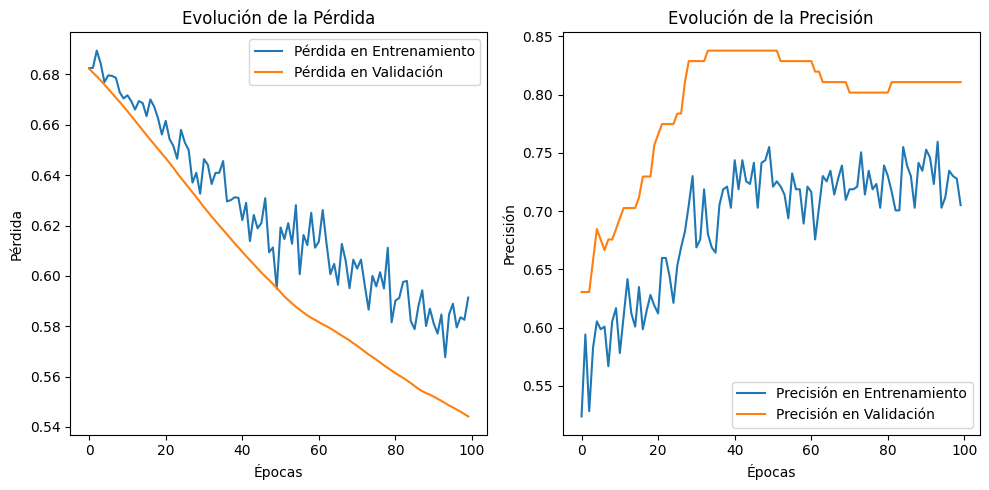

In [ ]:
#Entrena el modelo y documenta la evolución de la pérdida
historial = modelo.fit(
    X_train, y_train,
    epochs=100,
    batch_size=200,
    validation_data=(X_test, y_test),
    verbose=1 
)

#Documentación de la evolución de la pérdida
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida en Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión en Validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

Si la pérdida de entrenamiento disminuye es un buen indicio de aprendizaje, por tanto la de validación si disminuye también es buen indicio. Además, si ambas no varían mucho puede ser subajuste, no se ha aprendido adecuadamente. En el caso de las curvas de precisión el buen indicio es el aumento.

Es decir, la retropropagación indica un avance significativo en el proceso de aprendizaje de la red neural.

In [ ]:
# Evalúa el modelo en el conjunto de prueba
puntuacion = modelo.evaluate(X_test, y_test)

print(f"Pérdida en Prueba: {puntuacion[0]}")
print(f"Precisión en Prueba: {puntuacion[1]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8274 - loss: 0.5391 
Pérdida en Prueba: 0.5441940426826477
Precisión en Prueba: 0.8108108043670654


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = modelo.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Matriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E15541FCE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Matriz de Confusión:
[[44 11]
 [10 46]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        55
           1       0.8